In [1]:
import pandas as pd

# Antens farm

In [18]:
ANTENS_FILE_NAME = 'Antens farm structured data.xlsx'

In [2]:
def load_group_data(file, name_blood, name_slh):
    df_blood = pd.read_excel(file, sheet_name=name_blood)
    df_slh = pd.read_excel(file, sheet_name=name_slh)
    df_blood['cow_id'] = df_blood['Land'] + ' ' + df_blood['Levensnr'].astype(str)
    return df_blood, df_slh

In [3]:
def get_same_cows_ids(df_blood, df_slh):
    cow_ids_blood = set(df_blood['cow_id'])
    cow_ids_slh = set(df_slh['ID nummer'])
    return  cow_ids_blood.intersection(cow_ids_slh)

## Group 2348201

In [71]:
df_blood_2348201, df_slh_2348201 = load_group_data(
    ANTENS_FILE_NAME,
    name_blood='Group 2348201 - blood samples', 
    name_slh='Group 2348201 Slaughterhouse'
)

In [72]:
same_cows_2348201 = get_same_cows_ids(df_blood, df_slh)

In [73]:
len(same_cows_2348201)

549

In [114]:
df_slh_2348201.shape

(1428, 28)

**There are 549 same cows in both datasets**

## Group 2242208

In [8]:
df_blood_2242208, df_slh_2242208 = load_group_data(
    ANTENS_FILE_NAME,
    name_blood='Group 2242208 - blood samples',
    name_slh='Group 2242208 Slaughterhouse'
)

In [9]:
same_cows_2242208 = get_same_cows_ids(df_blood_2242208, df_slh_2242208)

In [10]:
len(same_cows_2242208)

491

**There are 491 same cows in both datasets**

## Group 2211207 

In [11]:
df_blood_2211207, df_slh_2211207 = load_group_data(
    ANTENS_FILE_NAME,
    name_blood='Group 2211207 - blood samples',
    name_slh='Group 2211207 Slaughterhouse',
)

In [12]:
same_cows_2211207 = get_same_cows_ids(df_blood_2211207, df_slh_2211207)

In [13]:
len(same_cows_2211207)

91

**There are 91 same cows in both datasets**

## Group 2133206

In [14]:
df_blood_2133206, df_slh_2133206 = load_group_data(
    ANTENS_FILE_NAME,
    name_blood='Group 2133206 - blood samples',
    name_slh='Group 2133206 Slaughterhouse',
)

In [15]:
same_cows_2133206 = get_same_cows_ids(df_blood_2133206, df_slh_2133206) 

In [16]:
len(same_cows_2133206)

511

**There are 511 same cows in both datasets**

In [70]:
df_blood.dropna(how='all', axis=1)

,Land,Levensnr,HB1,HB2,HB3,HB4,S2,S3,S4,cow_id
0,DE,542418100,6.0,6.4,NaN,NaN,0.0,NaN,NaN,DE 542418100
1,DK,4962404886,6.2,5.4,NaN,NaN,0.0,NaN,NaN,DK 4962404886
2,DE,125400062,6.7,5.1,NaN,NaN,0.0,NaN,NaN,DE 125400062
3,DE,365229318,5.6,7.0,NaN,NaN,0.0,NaN,NaN,DE 365229318
4,DE,1407018377,5.5,6.2,NaN,NaN,0.0,NaN,NaN,DE 1407018377
...,...,...,...,...,...,...,...,...,...,...
1445,DE,1082711586,6.4,7.2,NaN,NaN,0.0,NaN,NaN,DE 1082711586
1446,DE,771373360,5.2,6.0,NaN,NaN,0.0,NaN,NaN,DE 771373360
1447,DE,667953239,5.0,5.4,NaN,NaN,0.0,NaN,NaN,DE 667953239
1448,DE,1082698355,5.8,6.7,NaN,NaN,0.0,NaN,NaN,DE 1082698355


## Concatenate groups

In [74]:
df_blood_2133206['group'] = 2133206
df_blood_2211207['group'] = 2211207
df_blood_2242208['group'] = 2242208
df_blood_2348201['group'] = 2348201

In [99]:
antens_cows = pd.concat(
    [df_blood_2133206, df_blood_2211207, df_blood_2242208, df_blood_2348201],
    axis=0, ignore_index=True
).dropna(axis=1, how='all').fillna(-1)

## Treatments data

In [49]:
treatments_df = pd.read_excel(ANTENS_FILE_NAME, sheet_name='Treatments', header=None)
print(treatments_df.shape)
treatments_df.head(4)

(10422, 10)


,0,1,2,3,4,5,6,7,8,9
0,2021-08-18 00:00:00,dexa-ject,3505,DE 0124103505,NaN,2.0,ml(cc),15.0,dagen,2021-09-02 00:00:00
1,NaN,NaN,NL112615,NaN,(1x),NaN,NaN,NaN,NaN,NaN
2,2021-08-18 00:00:00,depoceline,3505,DE 0124103505,NaN,6.0,ml(cc),15.0,dagen,2021-09-04 00:00:00
3,NaN,NaN,NL4259,NaN,(3 x 24uur),NaN,NaN,NaN,NaN,NaN


In [50]:
treatments_cleaned = treatments_df.iloc[::2, :]
treatments_cleaned.loc[:, 0] = pd.to_datetime(treatments_cleaned[0])

In [51]:
columns_naming = {
    0: 'applied_date',
    1: 'applied_medicine',
    3: 'cow_id',
}
treatments_cleaned = treatments_cleaned.rename(columns=columns_naming)

In [52]:
treatments_cleaned = treatments_cleaned.drop(
    columns=[col for col in treatments_cleaned.columns if isinstance(col, int)]
)

In [53]:
treatments_cleaned['applied_medicine'].value_counts()

applied_medicine
Resflor                3241
dexa-ject               607
Genta-ject 10%          372
Amoxicilline            254
depoceline              197
trim-sul                168
2005-11-01 00:00:00     135
Buscopan Comp            68
micotil                  55
Draxin                   36
finadyne                 33
Vetalgin                 26
Catosal                  13
Vecoxan                   2
calcitad                  2
TMPSMZ                    1
Albipen LA                1
Name: count, dtype: int64

# Analyze sick cows

In [100]:
sick_cows = set(
    treatments_cleaned[treatments_cleaned['cow_id'].isin(
        same_cows_2133206 | same_cows_2211207 | same_cows_2242208 | same_cows_2348201
    )].drop_duplicates(subset='cow_id')['cow_id'].values
)

In [101]:
antens_cows['sick'] = antens_cows['cow_id'].apply(lambda cow: 1 if cow in sick_cows else 0)
antens_cows.head(1)

,Land,Levensnr,HB1,HB2,HB3,HB4,S2,S3,S4,cow_id,group,sick
0,NL,646244275,5.8,5.8,-1.0,-1.0,0.0,-1.0,-1.0,NL 646244275,2133206,0


In [102]:
# one-hot encoding
one_hot_encoded = pd.get_dummies(antens_cows['group'], prefix='group')
antens_cows = pd.concat([antens_cows, one_hot_encoded], axis=1)
antens_cows.drop('group', axis=1, inplace=True) 

# one-hot encoding
one_hot_encoded = pd.get_dummies(antens_cows['Land'], prefix='land')
antens_cows = pd.concat([antens_cows, one_hot_encoded], axis=1)
antens_cows.drop('Land', axis=1, inplace=True) 

In [103]:
antens_cows.columns

Index(['Levensnr', 'HB1', 'HB2', 'HB3', 'HB4', 'S2', 'S3', 'S4', 'cow_id',
       'sick', 'group_2133206', 'group_2211207', 'group_2242208',
       'group_2348201', 'land_BE', 'land_DE', 'land_DK', 'land_IE', 'land_NL'],
      dtype='object')

In [104]:
# Put sick feature to the end
antens_cows = antens_cows[['HB1', 'HB2', 'HB3', 'HB4', 'S2', 'S3', 'S4',
       'group_2133206', 'group_2211207', 'group_2242208',
       'group_2348201', 'land_BE', 'land_DE', 'land_DK', 'land_IE', 'land_NL', 'sick']]
antens_cows.head(1)

,HB1,HB2,HB3,HB4,S2,S3,S4,group_2133206,group_2211207,group_2242208,group_2348201,land_BE,land_DE,land_DK,land_IE,land_NL,sick
0,5.8,5.8,-1.0,-1.0,0.0,-1.0,-1.0,True,False,False,False,False,False,False,False,True,0


In [115]:
antens_cows.to_csv('antens_cows_features.csv')

In [106]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Compute the correlation matrix
corr = antens_cows.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt=".2f",
 annot=True)

<Axes: >

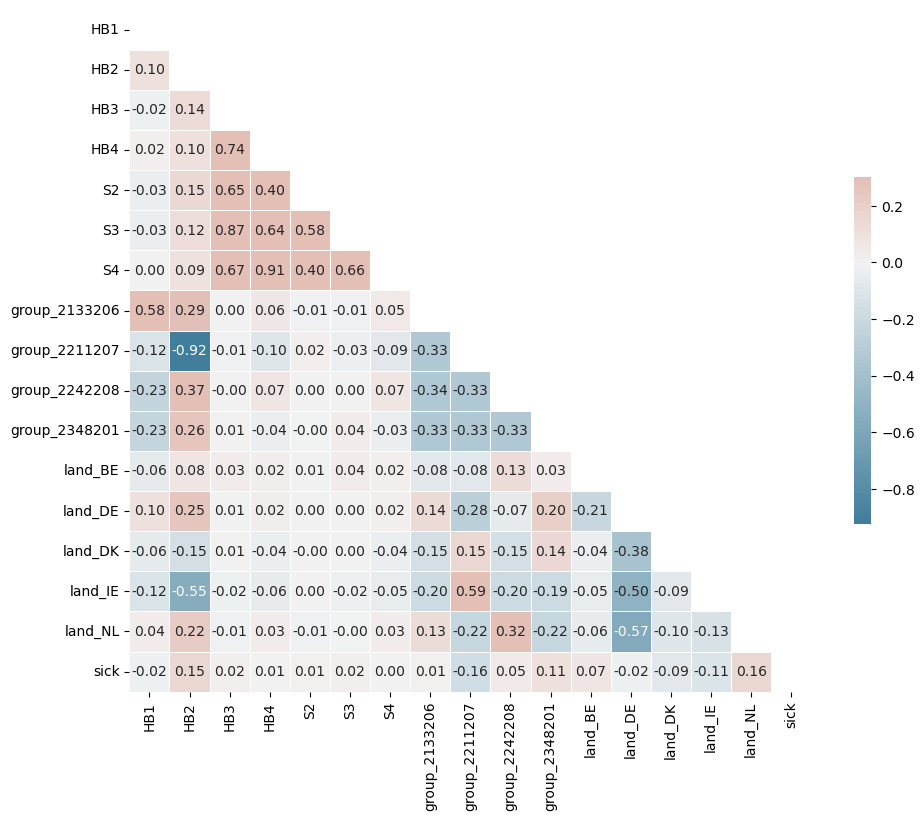

In [111]:
plt.show()

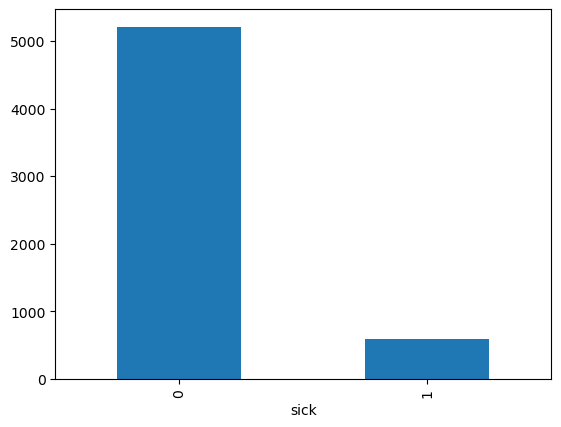

In [118]:
antens_cows['sick'].value_counts().plot(kind='bar')
plt.show()